## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#date and sqft_basement are str objects
#waterfront, view and yr_renovated have possible missing data. Lets deal with this first

df.isna().any() #General inquiry to see if the 'missing values' are null



id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
 #This way I verify that dropping the columns is not prudent. Can you clean this up? 
wf_np = round((df['waterfront'].isna().sum() / len(df['waterfront'])) * 100) 
vw_np = round((df['view'].isna().sum() / len(df['view'])) * 100) 
yr_np = round((df['yr_renovated'].isna().sum() / len(df['yr_renovated'])) * 100)

print("Waterfront null % = {}. View null % = {}. Yr_renovated null % = {}.".format(wf_np, vw_np, yr_np))


Waterfront null % = 11.0. View null % = 0.0. Yr_renovated null % = 18.0.


In [11]:
waterfront_mean = round(df.waterfront.mean())
waterfront_median = df.waterfront.median()
print(waterfront_mean)
print(waterfront_median)

0.0
0.0


In [23]:
df.waterfront.unique() 

array([nan,  0.,  1.])

In [38]:
#The unique values indicate that the waterfront category most likely has numerical
#place holder values. I do not want to elimnate rows or columns at this point. The best decision
#at the moment would be to replace all the NaNs with the median which is 0 
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].median())


In [39]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [40]:
view_mean = df.view.mean()
view_median = df.view.median()
print(view_mean)
print(view_median)

0.23386272870808952
0.0


In [41]:
df['view'] = df['view'].fillna(df['view'].median()) #Same as waterfront rationale 

In [42]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [45]:
#I am going to replace the NaNs with 0.0 This category is informative but I don't think 
#I will need to use this category for any regression models so filling in with zero seems ok
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

In [46]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

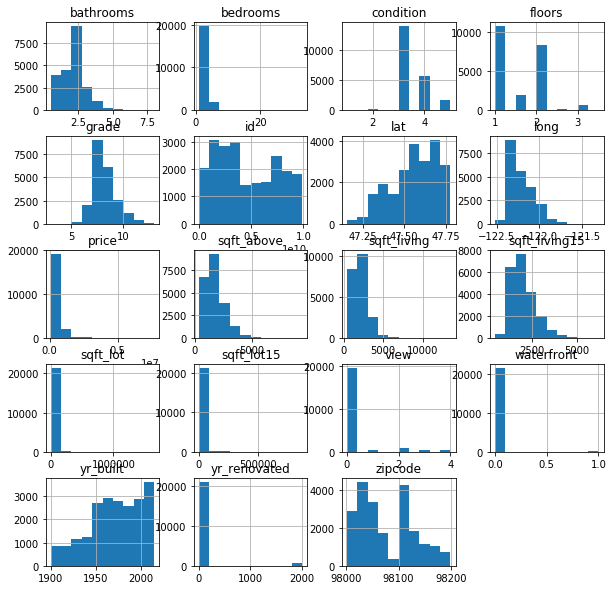

In [51]:
df.hist(figsize =(10,10));